In [70]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Importar base y explorar

In [58]:
#Import DataSet
#Using quotechar to deal with the format of dispositivo
df=pd.read_csv("ds_challenge_data_2022.csv",skipinitialspace = True,encoding = "utf-16",quotechar='"')
df.head()

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,dispositivo,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude
0,1,573,M,87000,56,581.03,02/01/20,0,"{'año': 2019, 'marca': 'Apple', 'proveedor': '...",Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False
1,2,737,F,34000,51,421.73,02/01/20,0,"{'año': 2021, 'marca': 'Huawei', 'proveedor': ...",Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False
2,3,887,F,52000,38,399.55,02/01/20,0,"{'año': 2017, 'marca': 'Apple', 'proveedor': '...",Farmacia,Tijuana,En proceso,False,0.0,11.99,False
3,4,1304,M,67000,60,828.01,02/01/20,0,"{'año': 2019, 'marca': 'Samsung', 'proveedor':...",Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False
4,5,1361,F,28000,52,886.04,02/01/20,0,"{'año': 2021, 'marca': 'Samsung', 'proveedor':...",Supermercado,Cancún,Aceptada,False,0.0,26.58,False


In [194]:
#Data Cleaning, dropping nulls and splitting variables from "dispositivo"
df1 = df.dropna()
df1[['anio', 'marca', 'proveedor']] = df1['dispositivo'].str.split(',',expand=True)
#df1.head()

C:\Users\hecto\AppData\Local\Temp\ipykernel_28444\2159582823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['anio', 'marca', 'proveedor']] = df1['dispositivo'].str.split(',',expand=True)
C:\Users\hecto\AppData\Local\Temp\ipykernel_28444\2159582823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['anio', 'marca', 'proveedor']] = df1['dispositivo'].str.split(',',expand=True)
C:\Users\hecto\AppData\Local\Temp\ipykernel_28444\2159582823.py:2: SettingWithCopyWarning: 
A value is trying to be se

In [195]:
df1['anio']=df1['anio'].str.replace("{'año': ","")
#df1.head()

C:\Users\hecto\AppData\Local\Temp\ipykernel_28444\3051093438.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['anio']=df1['anio'].str.replace("{'año': ","")
C:\Users\hecto\AppData\Local\Temp\ipykernel_28444\3051093438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['anio']=df1['anio'].str.replace("{'año': ","")


In [196]:
df1['marca']=df1['marca'].str.replace("'marca': ","")
df1['marca']=df1['marca'].str.replace("'","")
df1['proveedor']=df1['proveedor'].str.replace("'proveedor': ","")
df1['proveedor']=df1['proveedor'].str.replace("}","")
df1['proveedor']=df1['proveedor'].str.replace("'","")
df1 = df1.drop('dispositivo', axis=1)
df1.head()

C:\Users\hecto\AppData\Local\Temp\ipykernel_28444\2387577232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['marca']=df1['marca'].str.replace("'marca': ","")
C:\Users\hecto\AppData\Local\Temp\ipykernel_28444\2387577232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['marca']=df1['marca'].str.replace("'","")
C:\Users\hecto\AppData\Local\Temp\ipykernel_28444\2387577232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,transaction_id,user_id,género,linea_tc,interes_tc,monto,fecha,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,1,573,M,87000,56,581.03,02/01/20,0,Farmacia,Ciudad de México,Aceptada,False,0.0,17.43,False,2019,Apple,Telcel
1,2,737,F,34000,51,421.73,02/01/20,0,Tienda departamental,Cancún,Aceptada,False,0.0,12.65,False,2021,Huawei,ATT
2,3,887,F,52000,38,399.55,02/01/20,0,Farmacia,Tijuana,En proceso,False,0.0,11.99,False,2017,Apple,ATT
3,4,1304,M,67000,60,828.01,02/01/20,0,Tienda departamental,Ciudad de México,En proceso,False,0.0,24.84,False,2019,Samsung,ATT
4,5,1361,F,28000,52,886.04,02/01/20,0,Supermercado,Cancún,Aceptada,False,0.0,26.58,False,2021,Samsung,Telcel


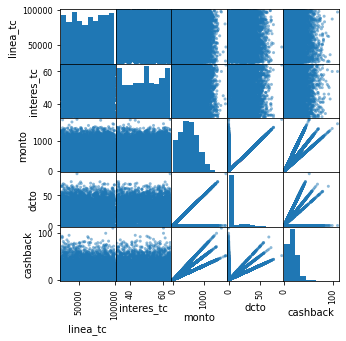

In [122]:
#Using a scatter matrix to observe most relevant numeric variables
from pandas.plotting import scatter_matrix
ax=scatter_matrix(df[['linea_tc','interes_tc','monto','dcto','cashback']], figsize=(5,5))

In [218]:
#Descriptive statistics for transaction amount
df1['monto'].describe()

count    23746.000000
mean       512.058296
std        290.572063
min          1.000000
25%        298.320000
50%        503.890000
75%        714.190000
max       1712.700000
Name: monto, dtype: float64

In [146]:
#Dataframe for frauds
dffraude = df1[df1['fraude']==True]
#dffraude.head()



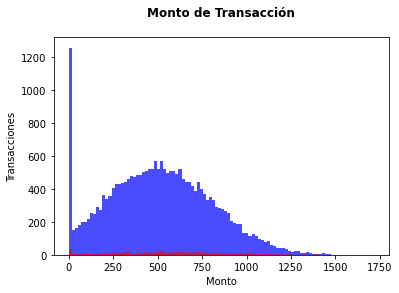

In [219]:
#Exploring amount distribution on all transactions and transactions involving fraud.

num_bins = 100
   

n, bins, patches = plt.hist(df1['monto'], num_bins, 
                            color ='blue',
                            alpha = 0.7)

plt.hist(dffraude['monto'], num_bins, 
                            color ='red',
                            alpha = 0.7)
  
plt.xlabel('Monto')
plt.ylabel('Transacciones')
  
plt.title('Monto de Transacción\n',
          fontweight ="bold")
  
plt.show()



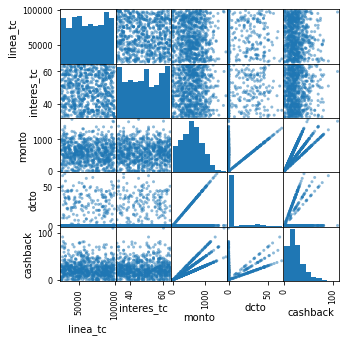

In [123]:
#Scatter Matrix for Fraud Data Frame
from pandas.plotting import scatter_matrix
ax=scatter_matrix(dffraude[['linea_tc','interes_tc','monto','dcto','cashback']], figsize=(5,5))

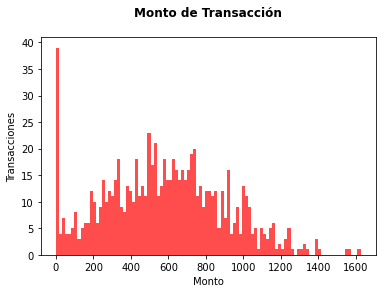

In [91]:
#Exploring amount distribution for transactions involving fraud.
n, bins, patches = plt.hist(dffraude['monto'], num_bins, 
                            color ='red',
                            alpha = 0.7)
plt.xlabel('Monto')
plt.ylabel('Transacciones')
  
plt.title('Monto de Transacción\n',
          fontweight ="bold")
  
plt.show()

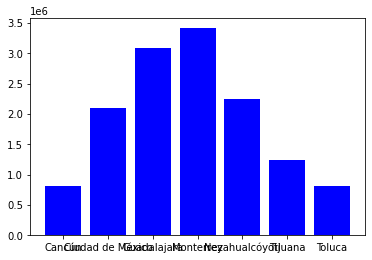

In [131]:
#Transaction amount by city

fig,ax = plt.subplots()
ax.bar(ciudades['ciudad'],ciudades['monto'],color='blue')
plt.show()

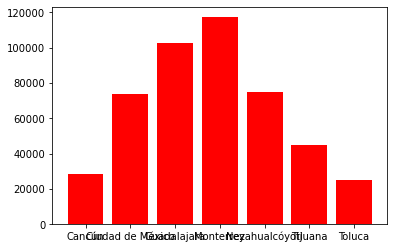

In [124]:
#Transaction amount for frauds by city

ciudadesf=dffraude.groupby(["ciudad"], as_index=False)["monto"].sum()
fig,ax = plt.subplots()
ax.bar(ciudadesf['ciudad'],ciudadesf['monto'],color='red')
plt.show()

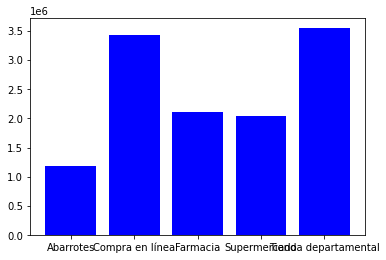

In [130]:
#Transaction amount by establishment
est=df.groupby(["establecimiento"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(est['establecimiento'],est['monto'],color='blue')
plt.show()

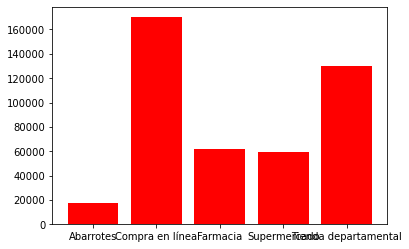

In [129]:
#Transaction amount for frauds by establishment, more skewed towards online shopping
estf=dffraude.groupby(["establecimiento"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(estf['establecimiento'],estf['monto'],color='red')
plt.show()

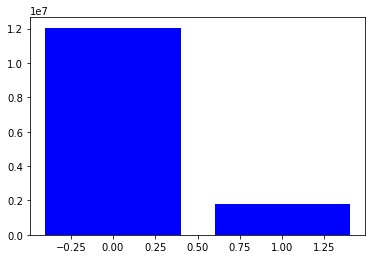

In [132]:
#Transaction amount by membership
pri=df.groupby(["is_prime"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(pri['is_prime'],pri['monto'],color='blue')
plt.show()

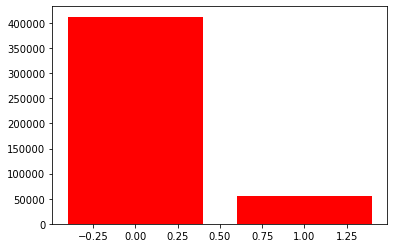

In [133]:
#Transaction amount for frauds by membership

prif=dffraude.groupby(["is_prime"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(prif['is_prime'],prif['monto'],color='red')
plt.show()

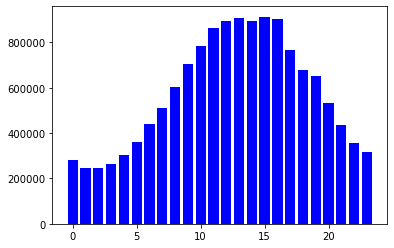

In [134]:
#Transaction amount by hour of day
hr=df.groupby(["hora"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(hr['hora'],hr['monto'],color='blue')
plt.show()

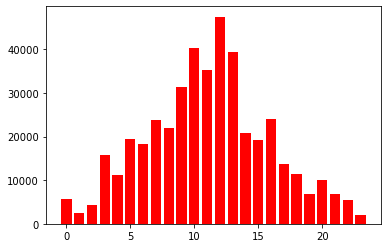

In [147]:
#Transaction for frauds amount by hour of day, skewed towards earlier in the day
hrf=dffraude.groupby(["hora"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(hrf['hora'],hrf['monto'],color='red')
plt.show()

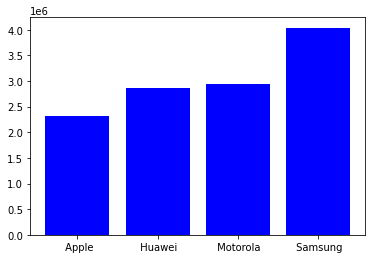

In [149]:
#Transaction amount by device model
marcas=df1.groupby(["marca"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(marcas['marca'],marcas['monto'],color='blue')
plt.show()

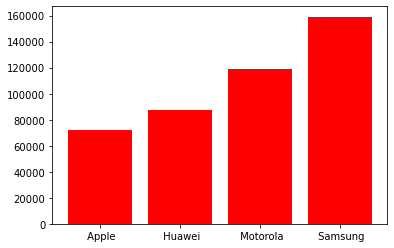

In [150]:
#Transaction amount for frauds by device model, more frauds are done in samsung and motorola devices
marcasf=dffraude.groupby(["marca"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(marcasf['marca'],marcasf['monto'],color='red')
plt.show()

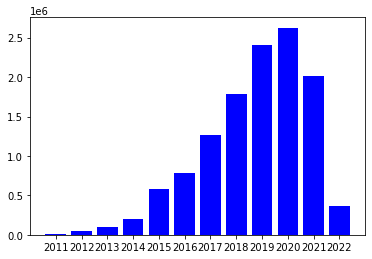

In [154]:
#Transaction amount by device model year
aniocel=df1.groupby(["anio"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(aniocel['anio'],aniocel['monto'],color='blue')
plt.show()

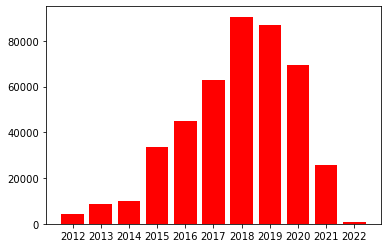

In [156]:
#Transaction amount for frauds by device model year, done significantly less on newer devices concentrated on devices between
#3 and 5 years old.
aniocelf=dffraude.groupby(["anio"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(aniocelf['anio'],aniocelf['monto'],color='red')
plt.show()

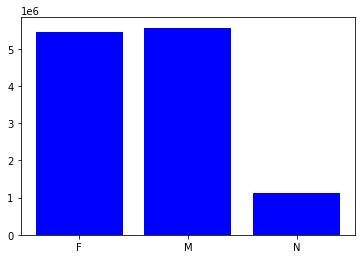

In [151]:
#Transaction amount by gender
gens=df1.groupby(["género"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(gens['género'],gens['monto'],color='blue')
plt.show()

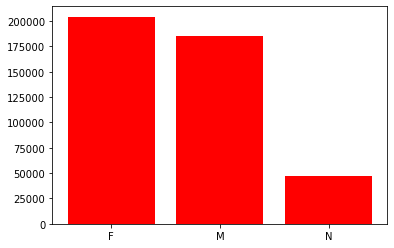

In [152]:
#Transaction amount for frauds by gender
gensf=dffraude.groupby(["género"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(gensf['género'],gensf['monto'],color='red')
plt.show()

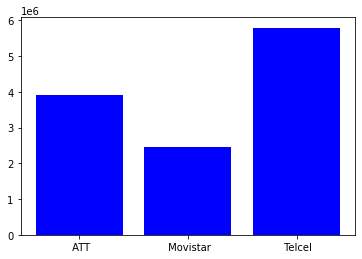

In [158]:
#Transaction amount by telecom
provs=df1.groupby(["proveedor"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(provs['proveedor'],provs['monto'],color='blue')
plt.show()

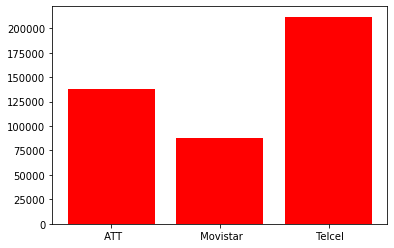

In [159]:
#Transaction amount for frauds by telecom
provsf=dffraude.groupby(["proveedor"], as_index=False)["monto"].sum()
est.head()
fig,ax = plt.subplots()
ax.bar(provsf['proveedor'],provsf['monto'],color='red')
plt.show()

Categorización de usuarios

In [108]:
#Agrupando la bdd por usuarios

usuarios = df.groupby(['user_id','género','is_prime'], as_index=False).agg({'monto': 'mean', 
                         'linea_tc':'mean', 
                         'interes_tc':'mean'})
usuarios.head()

,user_id,género,is_prime,monto,linea_tc,interes_tc
0,0,M,False,392.655000,71000.0,51.0
1,1,F,False,641.768571,94000.0,56.0
2,2,M,False,548.381429,55000.0,57.0
3,3,M,False,500.480000,62000.0,34.0
4,4,M,False,254.010000,83000.0,37.0


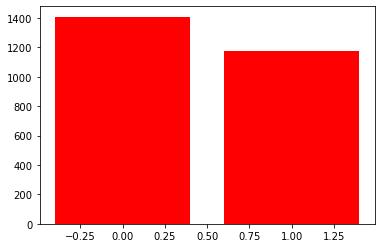

In [109]:
fig,ax = plt.subplots()
ax.bar(usuarios['is_prime'],usuarios['monto'],color='red')
plt.show()

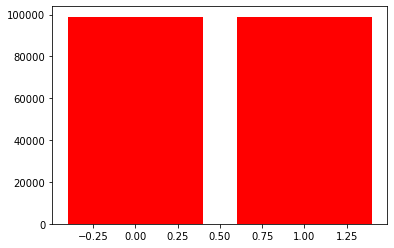

In [110]:
fig,ax = plt.subplots()
ax.bar(usuarios['is_prime'],usuarios['linea_tc'],color='red')
plt.show()

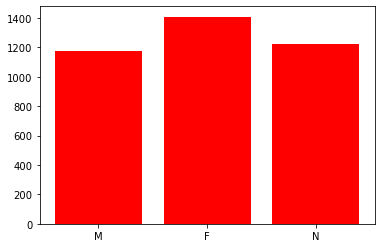

In [112]:
fig,ax = plt.subplots()
ax.bar(usuarios['género'],usuarios['monto'],color='red')
plt.show()

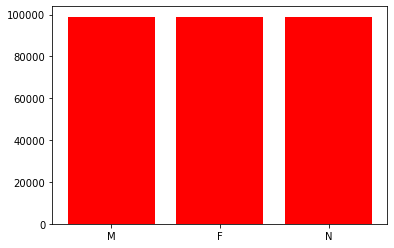

In [113]:
fig,ax = plt.subplots()
ax.bar(usuarios['género'],usuarios['linea_tc'],color='red')
plt.show()

Modelo de detección

In [199]:
#Scaling numeric variables
from sklearn.preprocessing import StandardScaler

dfmodelo = df1
dfmodelo = dfmodelo.reset_index()
dfmodelo = dfmodelo.drop(['transaction_id','user_id','fecha'], axis=1)

scaler = StandardScaler()
num_cols = ['linea_tc', 'interes_tc', 'hora','monto', 'dcto', 'cashback','anio']
dfmodelo[num_cols] = scaler.fit_transform(dfmodelo[num_cols])

dfmodelo.head()

,index,género,linea_tc,interes_tc,monto,hora,establecimiento,ciudad,status_txn,is_prime,dcto,cashback,fraude,anio,marca,proveedor
0,0,M,1.117497,0.811751,0.237370,-2.233799,Farmacia,Ciudad de México,Aceptada,False,-0.435784,0.050541,False,0.125877,Apple,Telcel
1,1,F,-1.304642,0.290151,-0.310870,-2.233799,Tienda departamental,Cancún,Aceptada,False,-0.435784,-0.387483,False,1.144129,Huawei,ATT
2,2,F,-0.482029,-1.066010,-0.387204,-2.233799,Farmacia,Tijuana,En proceso,False,-0.435784,-0.447963,False,-0.892375,Apple,ATT
3,3,M,0.203482,1.229032,1.087367,-2.233799,Tienda departamental,Ciudad de México,En proceso,False,-0.435784,0.729569,False,0.125877,Samsung,ATT
4,4,F,-1.578846,0.394471,1.287080,-2.233799,Supermercado,Cancún,Aceptada,False,-0.435784,0.889017,False,1.144129,Samsung,Telcel


In [200]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['género', 'establecimiento', 'ciudad', 'status_txn', 'is_prime','marca','proveedor']

# Encode Categorical Data
dfm_encoded = pd.DataFrame(encoder.fit_transform(dfmodelo[cat_cols]))
dfm_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categorical Data with Encoded Data
dfmodelo = dfmodelo.drop(cat_cols ,axis=1)
dfmodelo = pd.concat([dfm_encoded, dfmodelo], axis=1)

# Encode target value
dfmodelo['fraude'] = dfmodelo['fraude'].apply(lambda x: 1 if x == True else 0)

print('Shape of dataframe:', dfmodelo.shape)
dfmodelo.head()
dfmodelo.tail()

Shape of dataframe: (23746, 36)


C:\Users\hecto\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,género_F,género_M,género_N,establecimiento_Abarrotes,establecimiento_Compra en línea,establecimiento_Farmacia,establecimiento_Supermercado,establecimiento_Tienda departamental,ciudad_Cancún,ciudad_Ciudad de México,...,proveedor_ Telcel,index,linea_tc,interes_tc,monto,hora,dcto,cashback,fraude,anio
23741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,26970,-1.487444,-1.066010,0.652353,1.82518,-0.435784,0.382266,0,0.125877
23742,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,26971,-0.710532,-1.378971,-0.492653,1.82518,1.061648,-0.532269,0,1.144129
23743,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26972,0.660490,-1.170330,-1.389971,1.82518,-0.435784,-1.248869,0,0.635003
23744,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,26973,1.208898,0.603111,2.741105,1.82518,-0.435784,2.050971,0,-0.383249
23745,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,26974,-1.715948,0.081511,1.691223,1.82518,-0.435784,1.211578,0,-1.910626


In [203]:

# X
X_data = dfmodelo.drop('fraude', axis=1)

# Y
Y_data = dfmodelo['fraude']

# Training and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data , Y_data, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (18996, 35)
Shape of testing feature: (4750, 35)
Shape of training label: (18996,)
Shape of training label: (4750,)


In [204]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [205]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.9332631578947368
Precision: 0.07109004739336493
Recall: 0.11029411764705882
F1 Score: 0.08645533141210375
Cohens Kappa Score: 0.05349817519854061
Area Under Curve: 0.5339073535786226
Confusion Matrix:
 [[4418  196]
 [ 121   15]]


In [210]:
from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
nb = GaussianNB()
nb.fit(X_train, y_train)

# Evaluate Model
nb_eval = evaluate_model(nb, X_test, y_test)

# Print result
print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Cohens Kappa Score:', nb_eval['kappa'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:\n', nb_eval['cm'])

Accuracy: 0.9602105263157895
Precision: 0.2087912087912088
Recall: 0.13970588235294118
F1 Score: 0.16740088105726875
Cohens Kappa Score: 0.14783891379005942
Area Under Curve: 0.7050568601953136
Confusion Matrix:
 [[4542   72]
 [ 117   19]]


In [215]:
from sklearn.linear_model import LogisticRegression

# Building Naive Bayes model 
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

# Evaluate Model
logreg_eval = evaluate_model(logreg, X_test, y_test)

# Print result
print('Accuracy:', logreg_eval['acc'])
print('Precision:', logreg_eval['prec'])
print('Recall:', logreg_eval['rec'])
print('F1 Score:', logreg_eval['f1'])
print('Cohens Kappa Score:', logreg_eval['kappa'])
print('Area Under Curve:', logreg_eval['auc'])
print('Confusion Matrix:\n', logreg_eval['cm'])

Accuracy: 0.9713684210526315
Precision: 0.5
Recall: 0.007352941176470588
F1 Score: 0.014492753623188406
Cohens Kappa Score: 0.01367420101503003
Area Under Curve: 0.690220301384533
Confusion Matrix:
 [[4613    1]
 [ 135    1]]


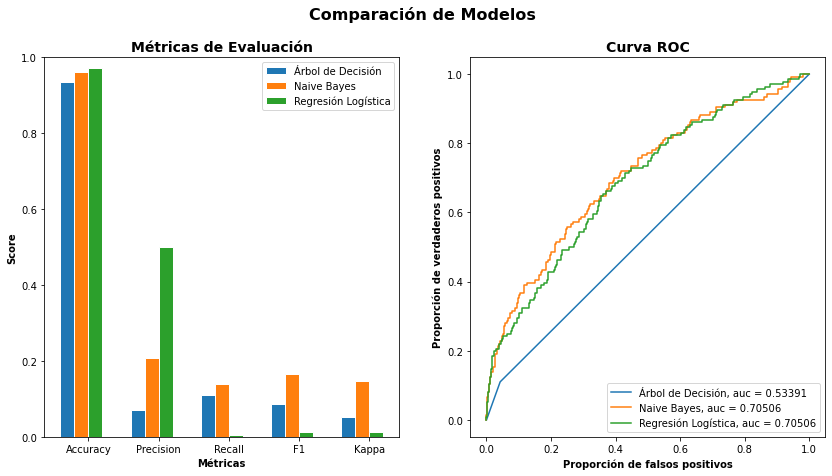

In [217]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparación de Modelos', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1'], nb_eval['kappa']]
logreg_score = [logreg_eval['acc'], logreg_eval['prec'], logreg_eval['rec'], logreg_eval['f1'], logreg_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Árbol de Decisión')
ax1.bar(r2, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r3, logreg_score, width=barWidth, edgecolor='white', label='Regresión Logística')

## Configure x and y axis
ax1.set_xlabel('Métricas', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Métricas de Evaluación', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Árbol de Decisión, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label='Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']))
ax2.plot(logreg_eval['fpr'], logreg_eval['tpr'], label='Regresión Logística, auc = {:0.5f}'.format(nb_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('Proporción de falsos positivos', fontweight='bold')
ax2.set_ylabel('Proporción de verdaderos positivos', fontweight='bold')

## Create legend & title
ax2.set_title('Curva ROC', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()
